## Simple Linear Regression: Scikit Learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Data/placement-package.csv")

In [3]:
df.sample(5)

,cgpa,package
19,7.48,2.83
9,8.31,3.51
120,5.23,1.73
3,7.42,3.67
5,7.89,2.99


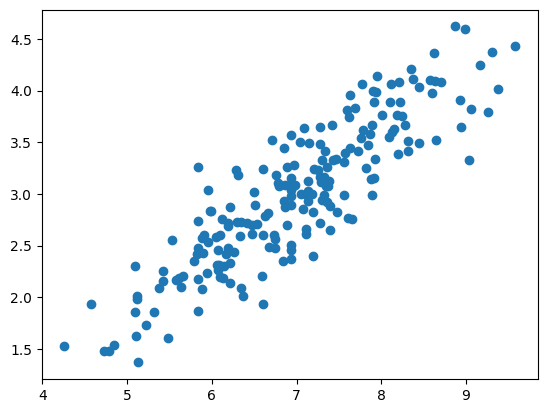

In [4]:
plt.scatter(x=df["cgpa"], y=df["package"])

In [5]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

X.shape, y.shape

((200, 1), (200,))

## Using Scikit Learn Simple Linear Regression
- Uses OLS method to optimize

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
lr = LinearRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# Reshape X_train to 2D as required by scikit-learn
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
x_input = X_test.iloc[0].values.reshape(-1, 1)
x_input

array([[6.1]])

In [11]:
y_out = lr.predict(x_input)
y_out

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.49047611])

In [12]:
# Predicting with the test value

y_pred = lr.predict(X_test)
y_pred.shape

(20,)

Text(0.5, 1.0, 'Prediction on X_test')

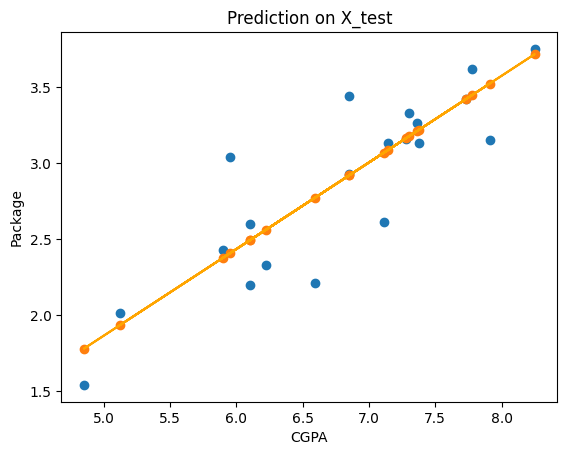

In [13]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.plot(X_test, y_pred, color="orange")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Prediction on X_test")

## Learned parameter values

In [14]:
m_slope = lr.coef_
c_intercept = lr.intercept_

In [15]:
print(f"Slope: {m_slope}")
print(f"Intercept: {c_intercept}")

Slope: [0.56979432]
Intercept: -0.9852692631584388


In [16]:
m_slope * 8.58 + c_intercept

array([3.90356603])

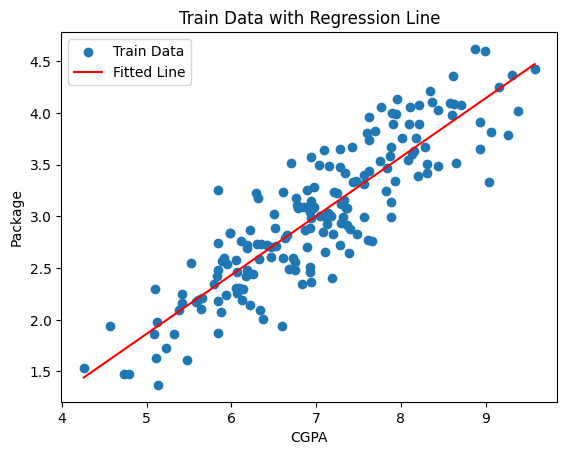

In [17]:
plt.scatter(X_train, y_train, label="Train Data")
x_vals = np.linspace(X_train["cgpa"].min(), X_train["cgpa"].max(), 100)
y_vals = m_slope[0] * x_vals + c_intercept
plt.plot(x_vals, y_vals, color="red", label="Fitted Line")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Train Data with Regression Line")
plt.legend()
plt.show()

## Custom Linear Regression

In [18]:
class LR:
    
    def __init__(self):
        self.m_slope = None
        self.c_intercept = None
        
    def fit(self, X, y):
        num = 0
        den = 0
        
        x_mean = X.mean()
        y_mean = y.mean()
        
        for i in range(X.shape[0]):
            num = num + ((X[i] - x_mean) * (y[i] - y_mean))
            den = den + np.power(((X[i] - x_mean)),2) 
            
        self.m_slope = num / den
        self.c_intercept = y_mean - (self.m_slope * x_mean)
        print(f"Best Slope: {self.m_slope}")
        print(f"Best Intercept: {self.c_intercept}")
        
    def predict(self, X):
        return self.m_slope * X + self.c_intercept
        

In [19]:
df.shape

(200, 2)

In [20]:
X, y = df.iloc[:, 0].values, df.iloc[:, -1].values

In [21]:
X[:10]

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31])

In [22]:
X[0]

6.89

In [23]:
X.mean()

6.990500000000001

In [24]:
y[0]

3.26

In [25]:
lr = LR()
lr.fit(X, y)

Best Slope: 0.5695912947937534
Best Intercept: -0.9856779462557332


In [26]:
y_pred = lr.predict(X)

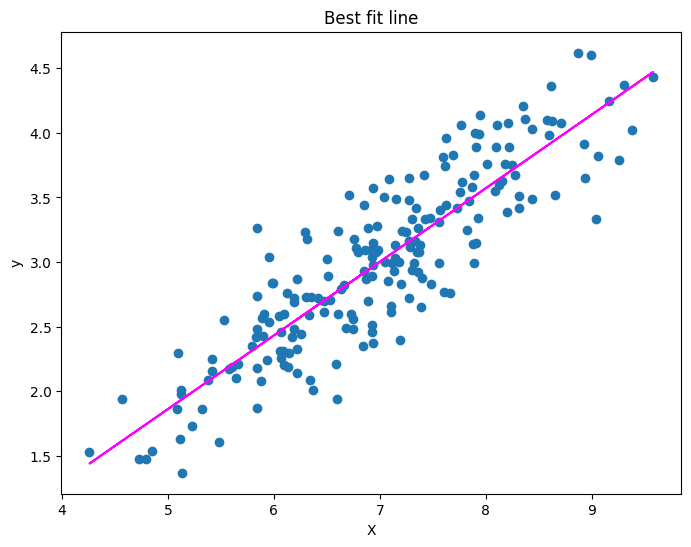

In [27]:
## Plotting the line

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, lr.predict(X.reshape(-1, 1)), color="magenta")
plt.title("Best fit line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Regression Metrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
df = pd.read_csv("../Data/placement-package.csv")

In [32]:
df.sample(5)

,cgpa,package
161,7.30,3.33
178,8.15,3.63
36,5.99,2.84
89,6.42,2.72
32,6.96,3.08


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 0],
    df.iloc[:, -1],
    test_size=0.1
)

In [34]:
X_train.shape, y_train.shape

((180,), (180,))

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred.shape

(20,)

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 0.27465096567697056
Mean Squared Error (MSE): 0.13689319848226625
Root Mean Squared Error (RMSE): 0.36999080864565576
R-squared (R2 Score): 0.6321894587562437
